## Métricas de Classificação

### Implementação das métricas accuracy, precision,recall e  f1_measure usando o dataset Iris



In [49]:
import pandas as pd
import sklearn as sk
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [28]:
data = pd.read_table('/home/kassia/UFC/ML/metricas de classificacao/iris.data', delimiter=',', header=0)


In [29]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [30]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

Divisão do dataset em treino(10%) e teste(90%):

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.9,random_state=51)

Standardização dos dados: 

In [35]:
std = preprocessing.StandardScaler()
x_tr_std = std.fit_transform(x_train)
x_te_std = std.transform(x_test)

Criação do modelo preditivo usando LogisticRegression:

In [36]:
modelo = linear_model.LogisticRegression(multi_class='auto', solver='lbfgs')
modelo.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred = modelo.predict(x_te_std)

    Criando matriz de confusão

In [38]:
metrics.confusion_matrix(y_test, y_pred)

array([[44,  0,  0],
       [46,  0,  0],
       [45,  0,  0]])

    Cálculo das métricas

In [39]:
metrics.accuracy_score(y_test, y_pred)

0.32592592592592595

In [40]:
metrics.precision_score(y_test, y_pred, average='weighted')

/home/kassia/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.10622770919067216

In [42]:
metrics.recall_score(y_test, y_pred, average='weighted')

0.32592592592592595

In [44]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.16023174012000826

    Obtendo o y_score

In [45]:
y_score = modelo.predict_proba(x_te_std)

    Gráfico da curva ROC

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1], pos_label='Iris-virginica')

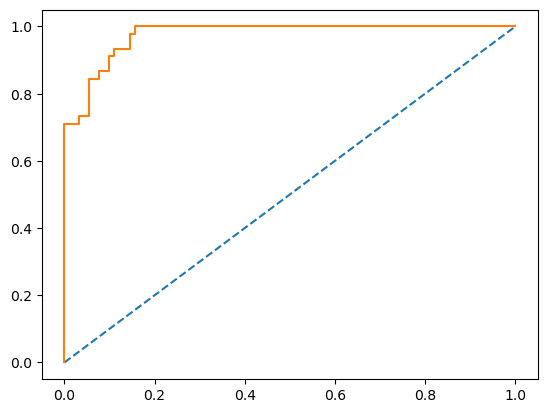

In [51]:
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr, tpr);